In [1]:
# Course 2: advertisment
# machine learning using statsmodel and sklearn
# main steps are written in copy

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
advertisement = pd.read_csv('advertising.csv')

In [4]:
advertisement.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertisement.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# visualizing
# using reglot pairplot heatmap

<AxesSubplot:xlabel='TV', ylabel='Sales'>

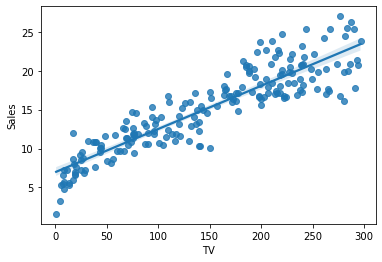

In [9]:
sns.regplot(data = advertisement, x='TV', y = 'Sales')

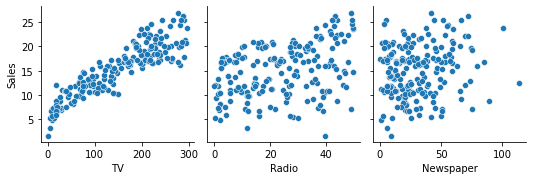

In [13]:
sns.pairplot(data = advertisement, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales')

In [ ]:
# yaha tv ra sales ko bich strong positive correleation cha
# aru ma weak positive correlation cha 

In [14]:
advertisement.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

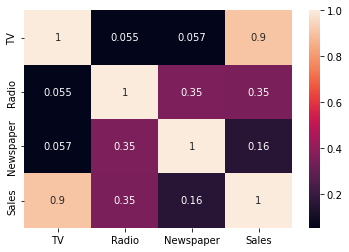

In [16]:
sns.heatmap(data = advertisement.corr(), annot = True )

In [19]:
# create X and y
# euta matrai lium predictor variable(independent variable)
# dherai wata ni lina sak6aum
X  = advertisement['TV']
y = advertisement['Sales']

In [32]:
X,  y

(0      230.1
 1       44.5
 2       17.2
 3      151.5
 4      180.8
        ...  
 195     38.2
 196     94.2
 197    177.0
 198    283.6
 199    232.1
 Name: TV, Length: 200, dtype: float64,
 0      22.1
 1      10.4
 2      12.0
 3      16.5
 4      17.9
        ... 
 195     7.6
 196    14.0
 197    14.8
 198    25.5
 199    18.4
 Name: Sales, Length: 200, dtype: float64)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)
# random_state 100 garda same training set din6, random_state arkai diye arkai training set din6

# total 200wata data rows bata train ra test ko lagi chuttaeko 70% training set lai
# X_train
# X_test
# y_train
# y_test

# 70% of 200 = 140

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140,), (60,), (140,), (60,))

In [ ]:
# aba k chahiyo vane coefficients ko value chahiyo
# tesko lagi hamile fit garnupar6
# ani tesko lagi lets use stats model

In [33]:
# lets take ony one independent/predictor variable TV
# so the model will learn coefficients(c and m1) from y = c + m1 x TV 
# means the model will find the coefficients values, learning the coefficients
# stats model ma c hunna
# so yo  y = c.const + m2 x TV banaune
# vannale euta explicitly euta column add garne junma 1.0 values hun6 harek rows ma
# euta matrai column TV leko chaum so arko const vanne ni col thapne
# so X_train ma euta matrai column hun6

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [51]:
# fit garna OLS regression model use gar6aum
# OLS regression model ko lagi c chahin6 
# so aba  OLS() ma train data y_train ra X_train dinuparyo model banauna
# y_train ma euta matrai hunupar6 column ra X_trainma duita hunupa6 columns y = c.const + m1 x X_train
# but X_train ma ta euta matrai column cha
# tara X_train ma ta c chaina so hamile c thapeko
# ie euta column 'const' vanne thapeko junma 1.0 matrai cha
X_train_sm = sm.add_constant(X_train) 
X_train_sm.head()
# In linear regression, a constant term (intercept) is typically included in the model. 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [52]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [53]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [54]:
# fitting: fit garnu vanekai coefficients nikalnu ho

# algorithm learns all the coefficients which is called fittiing
# statsmodel uses ordinary least square method to fit
# remember the way the regression works is minimizing the sum of the residuals
# OLS ko object banako, OLS regression model banako
lr = sm.OLS(y_train, X_train_sm) 

In [55]:
lr_model = lr.fit() # OLS regression model lai fit gareko
# lr_model is trained

In [56]:
lr_model.params
y = c.const + m1 x X_train
# coefficint of constant which is c is 6.94
# coefficicent of TV which is m1 is 0.05
# so Sales  = 6.94 + 0.05 x TV
# here looking at the parplot of TV vs sales m1 is +ve 
# and the intercept is +ve and when TV = 0 then Sales will still be non zero

const    6.948683
TV       0.054546
dtype: float64

In [57]:
lr_model.summary() # scikitlearn doesnoot give this summary

# look at the coef in which coeff of TV is +ve
# look at the p value which is nearly equal to 0 and very very low so there is significance of coefficients
# so there is genuine significance relation between the TV and sales and the relation is not just by chance
# look at the rsquared which is 0.81 which is 81% which is a good sign,ie 81% of the variance of the Sales is explained by TV
# look at Prob(F-static) which is very very low like 10^(-52) which is also good and signifies the realtion isnot just by chance

# mainly P>|t| herne, close to 0 vae cofficient is significant
# yo p value nai ho
# yadi p value less vae coefficient is significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        20:02:46   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

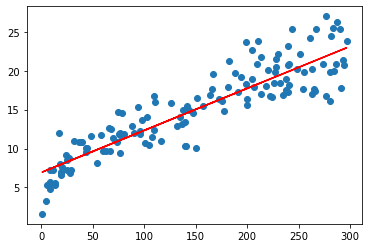

In [67]:
plt.scatter(X_train, y_train)

# for the given X_train the x value
# for this x value the y value is Sales = 6.94 + 0.054 x X_train
plt.plot(X_train, 6.94 + 0.054*X_train, 'r') #y_pred ko satta y=mx+c nai haleko
plt.show()
# yesari nagarey ni hun6
# y_train_pred vaneko nai 6.94 + 0.054*X_train ho so y_pred use garera garne

In [68]:
# yesari gare ni hun6
# X_train_pred, y_train_pred

y_train_pred = lr_model.predict(X_train_sm)

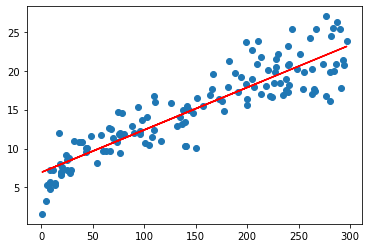

In [74]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r');

In [75]:
# residual analysis and predictions

res = y_train - y_train_pred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


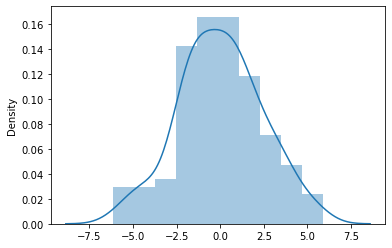

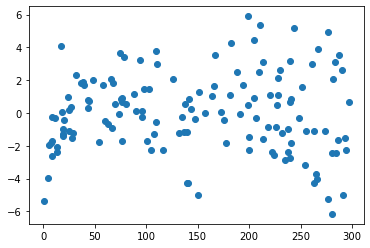

In [80]:
# is there a normal distribution of the errors or not lets check
plt.figure()
sns.distplot(res)
plt.show()

plt.scatter(X_train, res);

In [ ]:
# yaha 0 ko waripari nai sabai residuals/errors haru basya6
# so normal distribution cha vanera ni validate vayo.

In [ ]:
# Evaluation

In [90]:
X_test_sm = sm.add_constant(X_test)

lr = sm.OLS(y_test, X_test_sm)

lr_model = lr.fit()

y_test_pred = lr_model.predict(X_test_sm)

In [95]:
r2_test = r2_score(y_true = y_test , y_pred = y_test_pred)
r2


0.8157933136480389

In [96]:
r2_train = r2_score(y_true = y_train , y_pred = y_train_pred)
r2_train

0.8157933136480389

In [ ]:
# so anything within the 5% difference of r2 of the training and testing set is good

In [94]:
mean_squared_error(y_true = y_test , y_pred = y_test_pred)

3.666894746140686

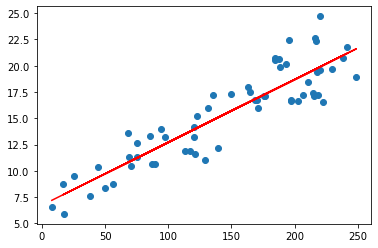

In [105]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r');

In [ ]:
# Using sklearn we do it

In [108]:
X_train.shape, X_test.shape

((140,), (60,))

In [123]:
type(X_train), type(X_test)

(pandas.core.series.Series, pandas.core.series.Series)

In [130]:
X_train_lm = X_train.to_numpy().reshape(-1,1)
X_test_lm = X_test.to_numpy().reshape(-1,1)

X_train_lm.shape, X_test_lm.shape

((140, 1), (60, 1))

In [132]:
lm = LinearRegression()

In [138]:
lm.fit(X_train_lm, y_train)

y_train_pred = lm.predict(X_train_lm)

r2_score(y_true = y_train , y_pred = y_train_pred)

0.8157933136480388

In [141]:
lm.fit(X_test_lm, y_test)

y_test_pred = lm.predict(X_test_lm)

r2_score(y_true = y_test , y_pred = y_test_pred )

0.8130410078090679

In [ ]:
# so the model is good since there is very less r2score difference